# CS5831 Advanced Data Mining
# Team: Papa

## Title: Sentiment Analysis using Text Mining and NLP

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import emoji
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("Tweets.csv")
df.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [3]:
missing_values_sum = df.isnull().sum()

print("Missing Values Sum:", missing_values_sum)

Missing Values Sum: textID           0
text             1
selected_text    1
sentiment        0
dtype: int64


In [4]:
# Drop rows with missing values
df.dropna(inplace=True)

In [5]:
df.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


In [6]:
df.dtypes

textID           object
text             object
selected_text    object
sentiment        object
dtype: object

In [7]:
print("Number of tweets: {}".format(len(df)))

Number of tweets: 27480


In [8]:
tweet_id = 4879
tweet = df.iloc[tweet_id]
print("Tweet: {}".format(tweet["selected_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))


Tweet: _ryan Just...it`s quiet a bit of it tbh xD
Tweet sentiment: neutral


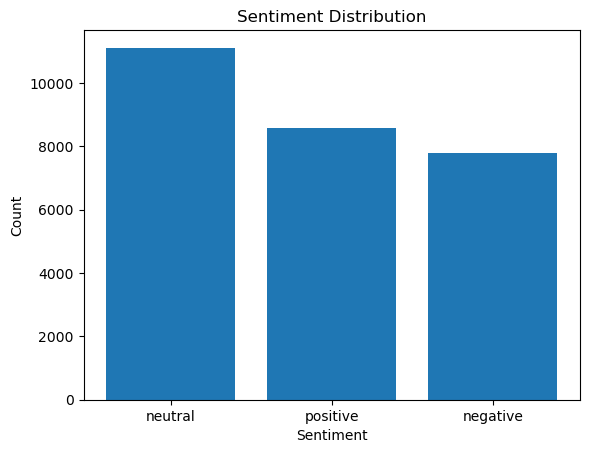

In [9]:
sentiment_count = df["sentiment"].value_counts()

plt.bar(sentiment_count.index, sentiment_count)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [10]:
#Print the count of positive and negative tweets
print("Number of + tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Number of - tweets: {}".format(df[df["sentiment"]=="negative"].count()[0]))

Number of + tweets: 8582
Number of - tweets: 7781


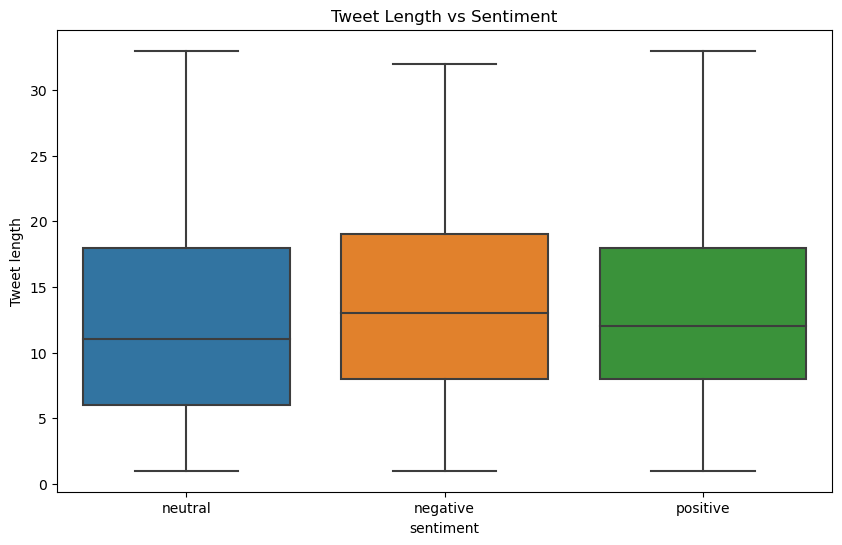

In [11]:
# Analyzing the Relationship Between Tweet Length and Sentiment (Before Preprocessing)
df['Tweet length'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='Tweet length', data=df)
plt.title('Tweet Length vs Sentiment')
plt.show()

In [12]:
# Dropping the 'textID' column
df.drop(columns=['textID'], inplace=True)

# Function to clean and preprocess text
def clean_and_preprocess_text(text):
    # Convert non-string to string
    text = str(text)
    # Lowercasing the text
    text = text.lower()
    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Removing special characters and numbers
    text = re.sub(r'\W+|\d+', ' ', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stop words and stemming
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    # Rejoining the tokens into a string
    return " ".join(filtered_tokens)

# Applying the cleaning function to 'text' and 'selected_text' columns
df['text'] = df['text'].apply(clean_and_preprocess_text)
df['selected_text'] = df['selected_text'].apply(clean_and_preprocess_text)

# Display 
print(df.head(2))

                      text selected_text sentiment  Tweet length
0               respond go    respond go   neutral             7
1  sooo sad miss san diego      sooo sad  negative            10


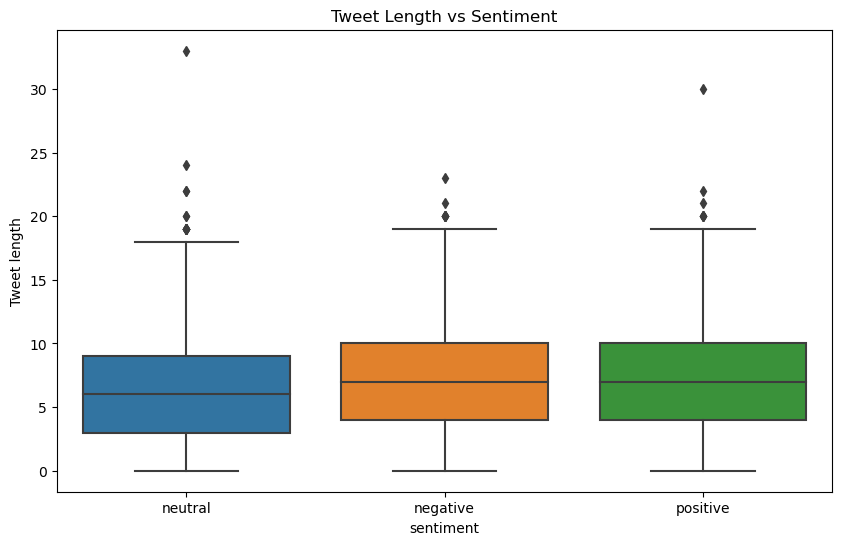

In [13]:
# Analyzing the Relationship Between Tweet Length and Sentiment
df['Tweet length'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='Tweet length', data=df)
plt.title('Tweet Length vs Sentiment')
plt.show()

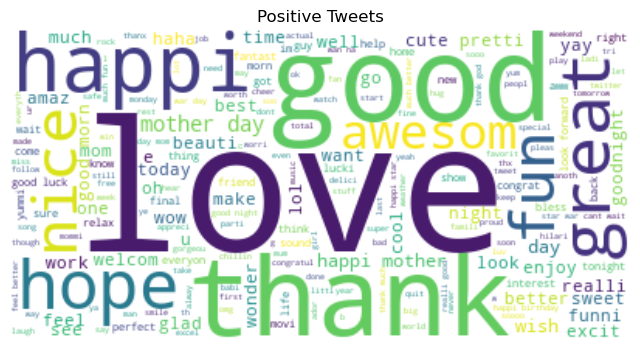

In [14]:
# The words that most often present in positive tweets
pos_tweets = df[df["sentiment"] == "positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["selected_text"])
wordcloud = WordCloud(background_color='white').generate(txt) 
plt.figure(figsize=(8, 6))
plt.title("Positive Tweets")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


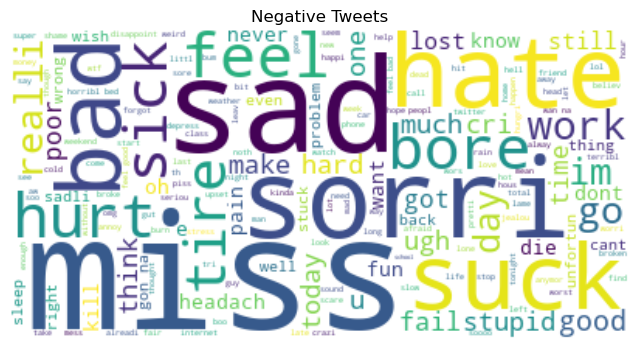

In [15]:
# The words that most often present in negative tweets
neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["selected_text"])
wordcloud = WordCloud(background_color='white').generate(txt)
plt.figure(figsize=(8, 6))
plt.title("Negative Tweets")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

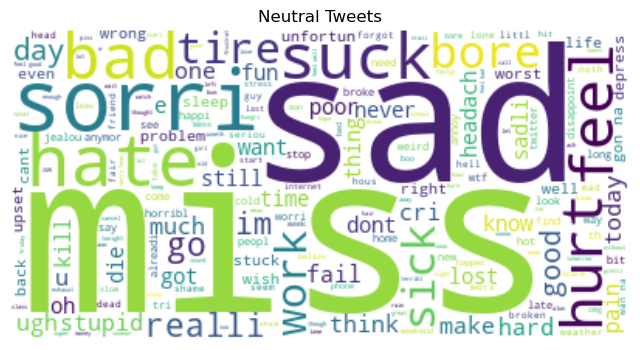

In [16]:
# The words that most often present in neutral tweets
neu_tweets = df[df["sentiment"]=="neutral"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["selected_text"])
wordcloud = WordCloud(background_color='white').generate(txt)
plt.figure(figsize=(8, 6))
plt.title("Neutral Tweets")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## TF-IDF Vectorization

In [17]:
# begin the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Apply TF-IDF to the 'text' column to have the feature matrix
X_tfidf = tfidf_vectorizer.fit_transform(df['selected_text'])

# Encoding the 'sentiment' column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

# create additional features
df['Tweet length'] = df['text'].apply(lambda x: len(x.split()))


#  include 'tweet_length' as a feature:
from scipy.sparse import hstack
X_final = hstack((X_tfidf, df[['Tweet length']].values.astype(float)))
# Actually the model performance fall behind around 10% when use tweet length as a feature so not use it. 
df.head()

,text,selected_text,sentiment,Tweet length
0,respond go,respond go,neutral,2
1,sooo sad miss san diego,sooo sad,negative,5
2,boss bulli,bulli,negative,2
3,interview leav alon,leav alon,negative,3
4,son put releas alreadi bought,son,negative,5


# ML Model Building and Validation

Training four different Machine Learning Models for the Proof of Concept

In [18]:
# Split the data into training, validation, and testing sets

X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Logistic Regression

In [19]:
# Initialize the models
logistic_model = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model and evaluate on validation set
logistic_model.fit(X_train, y_train)
logistic_train_preds = logistic_model.predict(X_train)
logistic_val_preds = logistic_model.predict(X_val)
logistic_train_accuracy = accuracy_score(y_train, logistic_train_preds)
logistic_val_accuracy = accuracy_score(y_val, logistic_val_preds)

#Printing Accuracy
print("Logistic Regression Training Accuracy:", logistic_train_accuracy)
print("Logistic Regression Validation Accuracy:", logistic_val_accuracy)

Logistic Regression Training Accuracy: 0.8563110833853191
Logistic Regression Validation Accuracy: 0.8119844735565259


# Naive Bayes

In [20]:
# Initialize the models
naive_bayes_model = MultinomialNB()

# Train the Naive Bayes model and evaluate on validation set
#Train Test Split
naive_bayes_model.fit(X_train, y_train)
naive_bayes_train_preds = naive_bayes_model.predict(X_train)
naive_bayes_val_preds = naive_bayes_model.predict(X_val)
naive_bayes_train_accuracy = accuracy_score(y_train, naive_bayes_train_preds)
naive_bayes_val_accuracy = accuracy_score(y_val, naive_bayes_val_preds)

#Printing Accuracy
print("Naive Bayes Training Accuracy:", naive_bayes_train_accuracy)
print("Naive Bayes Validation Accuracy:", naive_bayes_val_accuracy)

Naive Bayes Training Accuracy: 0.825951341235184
Naive Bayes Validation Accuracy: 0.7836001940805434


# Support Vector Machine

In [21]:
# Initializing Models
svm_model = SVC()
# Train the SVM model and evaluate on validation set
svm_model.fit(X_train, y_train)
svm_train_preds = svm_model.predict(X_train)
svm_val_preds = svm_model.predict(X_val)
svm_train_accuracy = accuracy_score(y_train, svm_train_preds)
svm_val_accuracy = accuracy_score(y_val, svm_val_preds)

#Printing Accuracy
print("SVM Training Accuracy:", svm_train_accuracy)
print("SVM Validation Accuracy:", svm_val_accuracy)

SVM Training Accuracy: 0.9127677271782075
SVM Validation Accuracy: 0.8112566715186803


# Random Forest 

In [22]:
#Initialing the models
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the Random Forest model and evaluate on validation set
random_forest_model.fit(X_train, y_train)
random_forest_train_preds = random_forest_model.predict(X_train)
random_forest_val_preds = random_forest_model.predict(X_val)
random_forest_train_accuracy = accuracy_score(y_train, random_forest_train_preds)
random_forest_val_accuracy = accuracy_score(y_val, random_forest_val_preds)

#Printing Accuracy
print("Random Forest Training Accuracy:", random_forest_train_accuracy)
print("Random Forest Validation Accuracy:", random_forest_val_accuracy)

Random Forest Training Accuracy: 0.9544603867747973
Random Forest Validation Accuracy: 0.7894226103833091


## Confusion Matrix

In [23]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')


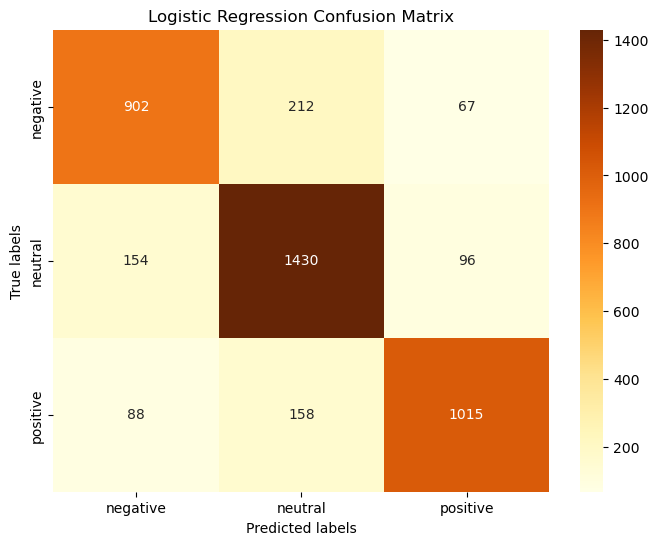

In [24]:
# Compute confusion matrix for Logistic Regression model
logistic_cm = confusion_matrix(y_val, logistic_val_preds)
plot_confusion_matrix(logistic_cm, label_encoder.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

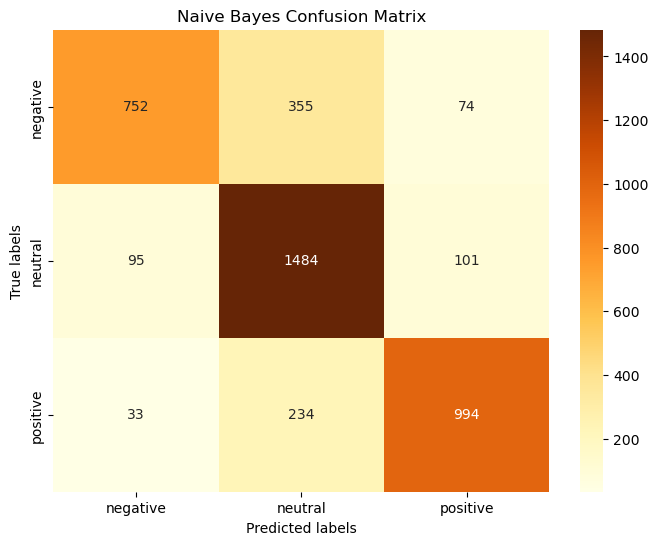

In [25]:
# Compute confusion matrix for Naive Bayes model
naive_bayes_cm = confusion_matrix(y_val, naive_bayes_val_preds)
plot_confusion_matrix(naive_bayes_cm, label_encoder.classes_)
plt.title('Naive Bayes Confusion Matrix')
plt.show()

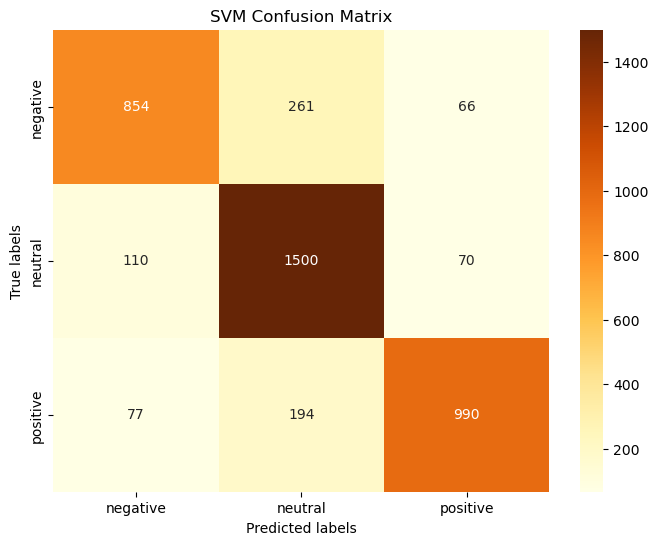

In [26]:
# Compute confusion matrix for SVM model
svm_cm = confusion_matrix(y_val, svm_val_preds)
plot_confusion_matrix(svm_cm, label_encoder.classes_)
plt.title('SVM Confusion Matrix')
plt.show()


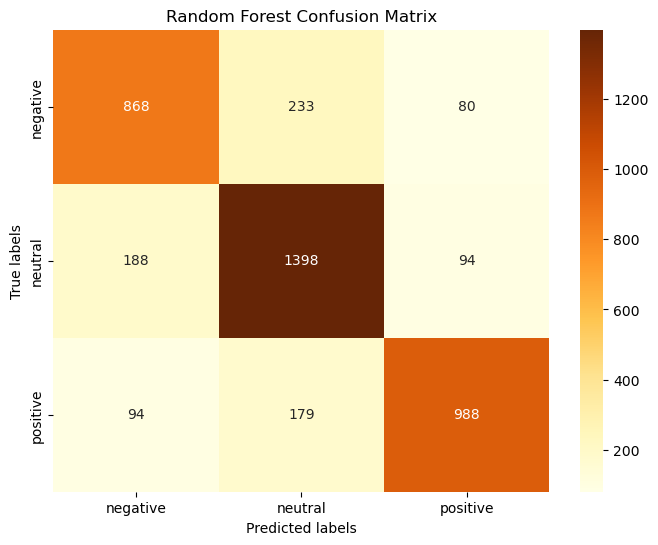

In [27]:
# Compute confusion matrix for Random Forest model
random_forest_cm = confusion_matrix(y_val, random_forest_val_preds)
plot_confusion_matrix(random_forest_cm, label_encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.show()

# Evaluating the models on the test data set

In [29]:
# Logistic Regression
logistic_test_preds = logistic_model.predict(X_test)
logistic_test_report = classification_report(y_test, logistic_test_preds)
print("Logistic Regression Test Classification Report")
print(logistic_test_report)

Logistic Regression Test Classification Report
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1175
           1       0.77      0.84      0.80      1663
           2       0.87      0.79      0.83      1284

    accuracy                           0.80      4122
   macro avg       0.80      0.79      0.80      4122
weighted avg       0.80      0.80      0.80      4122



In [30]:
# Naive Bayes
naive_bayes_test_preds = naive_bayes_model.predict(X_test)
naive_bayes_test_report = classification_report(y_test, naive_bayes_test_preds)
print("Naive Bayes Test Classification Report")
print(naive_bayes_test_report)

Naive Bayes Test Classification Report
              precision    recall  f1-score   support

           0       0.85      0.63      0.72      1175
           1       0.70      0.88      0.78      1663
           2       0.85      0.78      0.82      1284

    accuracy                           0.78      4122
   macro avg       0.80      0.76      0.77      4122
weighted avg       0.79      0.78      0.77      4122



In [31]:
# SVM
svm_test_preds = svm_model.predict(X_test)
svm_test_report = classification_report(y_test, svm_test_preds)
print("SVM Test Classification Report")
print(svm_test_report)

SVM Test Classification Report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1175
           1       0.76      0.88      0.81      1663
           2       0.88      0.79      0.83      1284

    accuracy                           0.80      4122
   macro avg       0.82      0.80      0.80      4122
weighted avg       0.81      0.80      0.80      4122



In [32]:
# Random Forest
random_forest_test_preds = random_forest_model.predict(X_test)
random_forest_test_report = classification_report(y_test, random_forest_test_preds)
print("Random Forest Test Classification Report")
print(random_forest_test_report)

Random Forest Test Classification Report
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1175
           1       0.78      0.84      0.81      1663
           2       0.86      0.78      0.82      1284

    accuracy                           0.80      4122
   macro avg       0.80      0.79      0.79      4122
weighted avg       0.80      0.80      0.80      4122



# Performing XGBoosting (Extreme Gradient Boosting) 

In [33]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

In [34]:
# Train the XGBoost model and evaluate on the validation set
xgb_model.fit(X_train, y_train)
xgb_val_preds = xgb_model.predict(X_val)
xgb_val_accuracy = accuracy_score(y_val, xgb_val_preds)
print("XGBoost Validation Accuracy:", xgb_val_accuracy)

XGBoost Validation Accuracy: 0.754973313925279


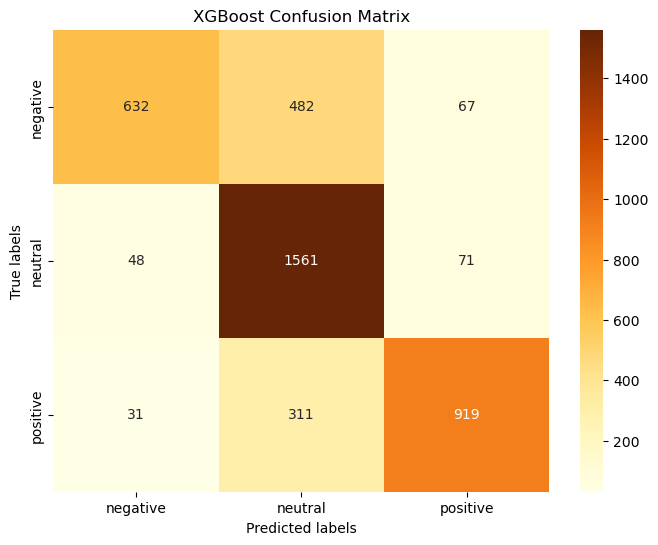

In [35]:
# Compute confusion matrix for XGBoost model
xgb_cm = confusion_matrix(y_val, xgb_val_preds)
plot_confusion_matrix(xgb_cm, label_encoder.classes_)
plt.title('XGBoost Confusion Matrix')
plt.show()

In [36]:
# Evaluate the XGBoost model on the test dataset
xgb_test_preds = xgb_model.predict(X_test)
xgb_test_report = classification_report(y_test, xgb_test_preds)
print("XGBoost Test Classification Report")
print(xgb_test_report)

XGBoost Test Classification Report
              precision    recall  f1-score   support

           0       0.88      0.52      0.66      1175
           1       0.65      0.92      0.76      1663
           2       0.87      0.73      0.79      1284

    accuracy                           0.75      4122
   macro avg       0.80      0.72      0.74      4122
weighted avg       0.78      0.75      0.74      4122



# Performing Gradient Boosting

In [37]:
# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier()

In [38]:
# Train the Gradient Boosting model and evaluate on the validation set
gb_model.fit(X_train, y_train)
gb_val_preds = gb_model.predict(X_val)
gb_val_accuracy = accuracy_score(y_val, gb_val_preds)
print("Gradient Boosting Validation Accuracy:", gb_val_accuracy)

Gradient Boosting Validation Accuracy: 0.7001455604075691


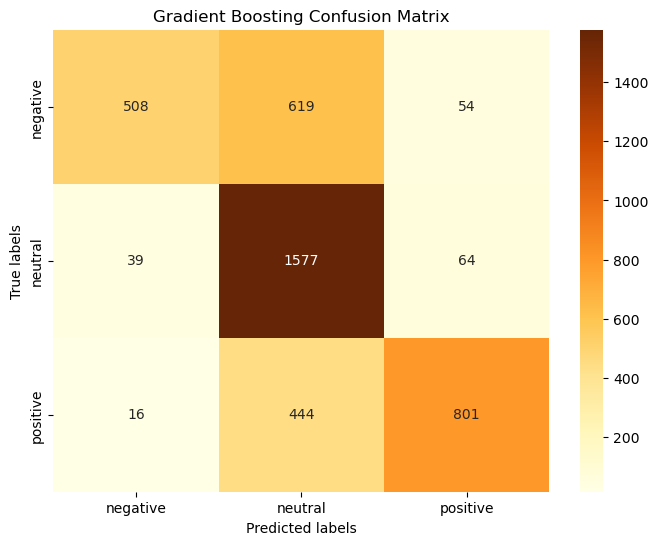

In [39]:
# Compute confusion matrix for Gradient Boosting model
gb_cm = confusion_matrix(y_val, gb_val_preds)
plot_confusion_matrix(gb_cm, label_encoder.classes_)
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

In [40]:
# Evaluate the Gradient Boosting model on the test dataset
gb_test_preds = gb_model.predict(X_test)
gb_test_report = classification_report(y_test, gb_test_preds)
print("Gradient Boosting Test Classification Report")
print(gb_test_report)

Gradient Boosting Test Classification Report
              precision    recall  f1-score   support

           0       0.91      0.42      0.57      1175
           1       0.59      0.95      0.73      1663
           2       0.89      0.64      0.74      1284

    accuracy                           0.70      4122
   macro avg       0.80      0.67      0.68      4122
weighted avg       0.77      0.70      0.69      4122



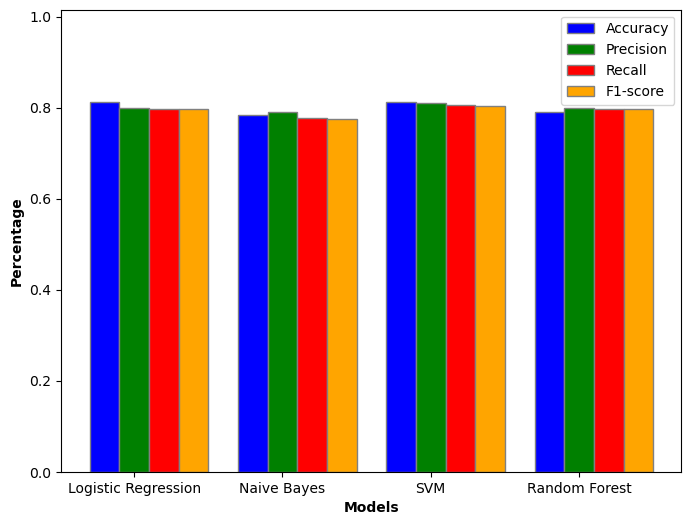

In [45]:
# Define the performance metrics for each model
models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Generate classification reports for each model
logistic_test_report = classification_report(y_test, logistic_test_preds, target_names=label_encoder.classes_, output_dict=True)
naive_bayes_test_report = classification_report(y_test, naive_bayes_test_preds, target_names=label_encoder.classes_, output_dict=True)
svm_test_report = classification_report(y_test, svm_test_preds, target_names=label_encoder.classes_, output_dict=True)
random_forest_test_report = classification_report(y_test, random_forest_test_preds, target_names=label_encoder.classes_, output_dict=True)

# Define the values for each metric and each model
accuracy = [logistic_val_accuracy, naive_bayes_val_accuracy, svm_val_accuracy, random_forest_val_accuracy]

# Extract precision, recall, and f1-score from test classification reports
precision = [logistic_test_report['weighted avg']['precision'], 
             naive_bayes_test_report['weighted avg']['precision'], 
             svm_test_report['weighted avg']['precision'], 
             random_forest_test_report['weighted avg']['precision']]

recall = [logistic_test_report['weighted avg']['recall'], 
          naive_bayes_test_report['weighted avg']['recall'], 
          svm_test_report['weighted avg']['recall'], 
          random_forest_test_report['weighted avg']['recall']]

f1_score = [logistic_test_report['weighted avg']['f1-score'], 
            naive_bayes_test_report['weighted avg']['f1-score'], 
            svm_test_report['weighted avg']['f1-score'], 
            random_forest_test_report['weighted avg']['f1-score']]

# Set the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the grouped bar plot
plt.figure(figsize=(8, 6))
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='orange', width=bar_width, edgecolor='grey', label='F1-score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
max_value = max(max(accuracy), max(precision), max(recall), max(f1_score))
plt.ylim(0, max_value * 1.25)

# Show the plot
plt.show()


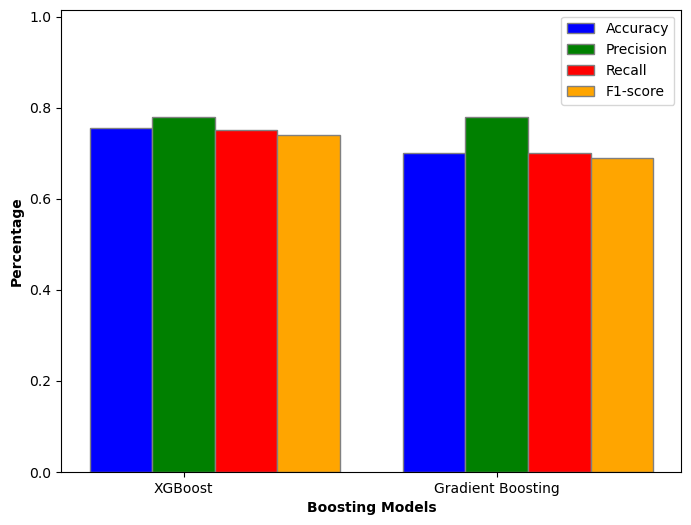

In [46]:
# Define the modelsfloat(adaboost_test_report.split()
boosting_models = ['XGBoost', 'Gradient Boosting']

# Define the values for each metric and each model
accuracy_boosting = [xgb_val_accuracy, gb_val_accuracy]
precision_boosting = [float(xgb_test_report.split()[-4])]
recall_boosting = [float(xgb_test_report.split()[-3]), float(gb_test_report.split()[-3])]
f1_score_boosting = [float(xgb_test_report.split()[-2]), float(gb_test_report.split()[-2])]

# Set the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
r1 = np.arange(len(boosting_models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the grouped bar plot
plt.figure(figsize=(8, 6))
plt.bar(r1, accuracy_boosting, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_boosting, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall_boosting, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score_boosting, color='orange', width=bar_width, edgecolor='grey', label='F1-score')
plt.xlabel('Boosting Models', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(boosting_models))], boosting_models)

# Add a legend
plt.legend(bbox_to_anchor = (1,1))
max_value = max(max(accuracy), max(precision), max(recall), max(f1_score))
plt.ylim(0, max_value * 1.25)

# Show the plot
plt.show()